# Dataset Overview

This dataset is from https://www.kaggle.com/uciml/mushroom-classification
    
         This Dataset is about to classify whether the mushroom is poison or edible, and for the features are about the form of the mushroom i.e cap shape, cap surface, cap color, etc. For the features details are following :

- class: edible=e, poisonous=p
- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif

from model_testing import ModelSelection

In [2]:
df = pd.read_csv("Dataset\\mushrooms.csv")

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In this dataset there's no noise data and missing data, let's check if this data is imbalance

In [4]:
df['class'].value_counts() / df.shape[0]

e    0.517971
p    0.482029
Name: class, dtype: float64

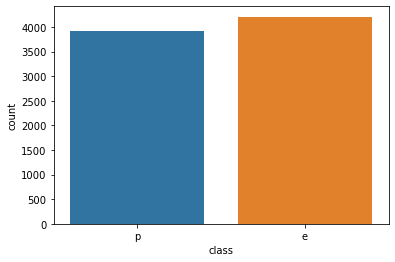

In [5]:
sns.countplot(data=df, x='class')

plt.show()

This data is balance, so let's check if feature selection affect the model. We're gonna compare of each feature selection technique and without feature selection, we're gonna use ANOVA, Mutual Info, Chi2

In [6]:
def transform(df, column):
    le = LabelEncoder()
    
    le.fit(df[column])
    
    return le.transform(df[column])

In [7]:
transformed_df = pd.DataFrame()

for column in df.columns:
    transformed_df[column] = transform(df, column)

# Modelling

In [8]:
X = transformed_df.drop(columns=['class'])
y = transformed_df['class']

In [9]:
def feature_selection(score_func, x, y, k):
    skb = SelectKBest(score_func=score_func, k=k)
    skb.fit(x, y)
    
    selected_x = skb.transform(x)
    
    return selected_x, skb

## Chi2

### K = 5

In [10]:
selected_X, skb = feature_selection(chi2, X, y, 5)

In [11]:
models = [SVC(), RandomForestClassifier(), GaussianNB(), MLPClassifier(), DecisionTreeClassifier()]

selection = ModelSelection(selected_X, y, models)

In [12]:
selection.use_train_test_split()

Model info
--------------------
Model name : SVC
Model name : RandomForestClassifier
Model name : GaussianNB
Model name : MLPClassifier
Model name : DecisionTreeClassifier

Training models
--------------------
Done Training SVC in time:2.870826244354248
Done Training RandomForestClassifier in time:3.540785551071167
Done Training GaussianNB in time:3.5517871379852295
Done Training MLPClassifier in time:13.37219500541687
Done Training DecisionTreeClassifier in time:13.379194736480713
--------------------
Done Training models in time : 13.379194736480713


The Scores :

Train SVC score : 0.9292669483740584
Train RandomForestClassifier score : 0.9722579459856696
Train GaussianNB score : 0.8085614550799192
Train MLPClassifier score : 0.9649090575050524
Train DecisionTreeClassifier score : 0.9722579459856696
----------
Test SVC score : 0.9227900037299515
Test RandomForestClassifier score : 0.9727713539723983
Test GaussianNB score : 0.8052965311450951
Test MLPClassifier score : 0.963819470346

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
selection.use_stratifiedkfold()

Fold 1
----------

Training models

--------------------
Done Training SVC in time:3.598782777786255

The Scores :

Train SVC score : 0.9269118325896292
Test SVC score : 0.9206153846153846
Bias SVC score : 0.006296447974244557

--------------------
Done Training RandomForestClassifier in time:4.305740594863892

The Scores :

Train RandomForestClassifier score : 0.9721495614709955
Test RandomForestClassifier score : 0.9735384615384616
Bias RandomForestClassifier score : -0.001388900067466059

--------------------
Done Training GaussianNB in time:4.315743446350098

The Scores :

Train GaussianNB score : 0.8212032620403139
Test GaussianNB score : 0.792
Bias GaussianNB score : 0.02920326204031387


C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------
Done Training MLPClassifier in time:15.695053815841675

The Scores :

Train MLPClassifier score : 0.9690721649484536
Test MLPClassifier score : 0.9710769230769231
Bias MLPClassifier score : -0.0020047581284694527

--------------------
Done Training DecisionTreeClassifier in time:15.70605993270874

The Scores :

Train DecisionTreeClassifier score : 0.9721495614709955
Test DecisionTreeClassifier score : 0.9735384615384616
Bias DecisionTreeClassifier score : -0.001388900067466059
--------------------
Done Training models in time : 15.70605993270874

Fold 2
----------

Training models

--------------------
Done Training SVC in time:3.5427870750427246

The Scores :

Train SVC score : 0.9289121403292814
Test SVC score : 0.9347692307692308
Bias SVC score : -0.0058570904399494195

--------------------
Done Training RandomForestClassifier in time:4.230748176574707

The Scores :

Train RandomForestClassifier score : 0.9719956916448684
Test RandomForestClassifier score : 0.9

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------
Done Training MLPClassifier in time:15.880044221878052

The Scores :

Train MLPClassifier score : 0.9683028158178181
Test MLPClassifier score : 0.9692307692307692
Bias MLPClassifier score : -0.0009279534129511546

--------------------
Done Training DecisionTreeClassifier in time:15.892042636871338

The Scores :

Train DecisionTreeClassifier score : 0.9719956916448684
Test DecisionTreeClassifier score : 0.9741538461538461
Bias DecisionTreeClassifier score : -0.0021581545089777165
--------------------
Done Training models in time : 15.892042636871338

Fold 3
----------

Training models

--------------------
Done Training SVC in time:3.840769052505493

The Scores :

Train SVC score : 0.9238344360670873
Test SVC score : 0.9403076923076923
Bias SVC score : -0.016473256240605028

--------------------
Done Training RandomForestClassifier in time:4.506729364395142

The Scores :

Train RandomForestClassifier score : 0.9713802123403601
Test RandomForestClassifier score : 0.

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------
Done Training MLPClassifier in time:15.876047849655151

The Scores :

Train MLPClassifier score : 0.968148945991691
Test MLPClassifier score : 0.9747692307692307
Bias MLPClassifier score : -0.006620284777539731

--------------------
Done Training DecisionTreeClassifier in time:15.885047912597656

The Scores :

Train DecisionTreeClassifier score : 0.9713802123403601
Test DecisionTreeClassifier score : 0.9766153846153847
Bias DecisionTreeClassifier score : -0.005235172275024569
--------------------
Done Training models in time : 15.885047912597656

Fold 4
----------

Training models

--------------------
Done Training SVC in time:3.672780752182007

The Scores :

Train SVC score : 0.9326050161563317
Test SVC score : 0.92
Bias SVC score : 0.012605016156331694

--------------------
Done Training RandomForestClassifier in time:4.325738430023193

The Scores :

Train RandomForestClassifier score : 0.9733805200800123
Test RandomForestClassifier score : 0.9686153846153847
B

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------
Done Training MLPClassifier in time:15.620554208755493

The Scores :

Train MLPClassifier score : 0.9658408985997846
Test MLPClassifier score : 0.9593846153846154
Bias MLPClassifier score : 0.006456283215169223

--------------------
Done Training DecisionTreeClassifier in time:15.632554769515991

The Scores :

Train DecisionTreeClassifier score : 0.9733805200800123
Test DecisionTreeClassifier score : 0.9686153846153847
Bias DecisionTreeClassifier score : 0.004765135464627646
--------------------
Done Training models in time : 15.632554769515991

Fold 5
----------

Training models

--------------------
Done Training SVC in time:3.6017866134643555

The Scores :

Train SVC score : 0.9293846153846154
Test SVC score : 0.9254926108374384
Bias SVC score : 0.003892004547176975

--------------------
Done Training RandomForestClassifier in time:4.2857420444488525

The Scores :

Train RandomForestClassifier score : 0.9732307692307692
Test RandomForestClassifier score : 0.969

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### K = 10

In [14]:
selected_X, skb = feature_selection(chi2, X, y, 10)

In [15]:
models = [SVC(), RandomForestClassifier(), GaussianNB(), MLPClassifier(), DecisionTreeClassifier()]

selection = ModelSelection(selected_X, y, models)

In [16]:
selection.use_train_test_split()

Model info
--------------------
Model name : SVC
Model name : RandomForestClassifier
Model name : GaussianNB
Model name : MLPClassifier
Model name : DecisionTreeClassifier

Training models
--------------------
Done Training SVC in time:2.182868719100952
Done Training RandomForestClassifier in time:2.8908262252807617
Done Training GaussianNB in time:2.9018256664276123
Done Training MLPClassifier in time:11.834173202514648
Done Training DecisionTreeClassifier in time:11.84617018699646
--------------------
Done Training models in time : 11.84617018699646


The Scores :

Train SVC score : 0.9751975013779166
Train RandomForestClassifier score : 1.0
Train GaussianNB score : 0.8993202278155429
Train MLPClassifier score : 1.0
Train DecisionTreeClassifier score : 1.0
----------
Test SVC score : 0.9735173442745244
Test RandomForestClassifier score : 1.0
Test GaussianNB score : 0.8910854158895934
Test MLPClassifier score : 1.0
Test DecisionTreeClassifier score : 1.0
----------
Bias SVC score : 0.

In [17]:
selection.use_stratifiedkfold()

Fold 1
----------

Training models

--------------------
Done Training SVC in time:2.5158493518829346

The Scores :

Train SVC score : 0.9783043545160794
Test SVC score : 0.976
Bias SVC score : 0.0023043545160794654

--------------------
Done Training RandomForestClassifier in time:3.271804094314575

The Scores :

Train RandomForestClassifier score : 1.0
Test RandomForestClassifier score : 1.0
Bias RandomForestClassifier score : 0.0

--------------------
Done Training GaussianNB in time:3.288801670074463

The Scores :

Train GaussianNB score : 0.8989075242344976
Test GaussianNB score : 0.8873846153846154
Bias GaussianNB score : 0.011522908849882163

--------------------
Done Training MLPClassifier in time:12.050718069076538

The Scores :

Train MLPClassifier score : 1.0
Test MLPClassifier score : 1.0
Bias MLPClassifier score : 0.0

--------------------
Done Training DecisionTreeClassifier in time:12.06171727180481

The Scores :

Train DecisionTreeClassifier score : 1.0
Test DecisionTre

### K = 15

In [18]:
selected_X, skb = feature_selection(chi2, X, y, 15)

In [19]:
models = [SVC(), RandomForestClassifier(), GaussianNB(), MLPClassifier(), DecisionTreeClassifier()]

selection = ModelSelection(selected_X, y, models)

In [20]:
selection.use_train_test_split()

Model info
--------------------
Model name : SVC
Model name : RandomForestClassifier
Model name : GaussianNB
Model name : MLPClassifier
Model name : DecisionTreeClassifier

Training models
--------------------
Done Training SVC in time:1.8858866691589355
Done Training RandomForestClassifier in time:2.6378397941589355
Done Training GaussianNB in time:2.646839141845703
Done Training MLPClassifier in time:10.389373779296875
Done Training DecisionTreeClassifier in time:10.402373552322388
--------------------
Done Training models in time : 10.402373552322388


The Scores :

Train SVC score : 0.9865882785228735
Train RandomForestClassifier score : 1.0
Train GaussianNB score : 0.8947271725151571
Train MLPClassifier score : 1.0
Train DecisionTreeClassifier score : 1.0
----------
Test SVC score : 0.9861991794106677
Test RandomForestClassifier score : 1.0
Test GaussianNB score : 0.8869824692279
Test MLPClassifier score : 1.0
Test DecisionTreeClassifier score : 1.0
----------
Bias SVC score : 0.0

In [21]:
selection.use_stratifiedkfold()

Fold 1
----------

Training models

--------------------
Done Training SVC in time:2.2816202640533447

The Scores :

Train SVC score : 0.9869210647791968
Test SVC score : 0.9833846153846154
Bias SVC score : 0.00353644939458142

--------------------
Done Training RandomForestClassifier in time:3.0335781574249268

The Scores :

Train RandomForestClassifier score : 1.0
Test RandomForestClassifier score : 1.0
Bias RandomForestClassifier score : 0.0

--------------------
Done Training GaussianNB in time:3.0555806159973145

The Scores :

Train GaussianNB score : 0.8985997845822434
Test GaussianNB score : 0.8824615384615384
Bias GaussianNB score : 0.016138246120705024

--------------------
Done Training MLPClassifier in time:10.149146556854248

The Scores :

Train MLPClassifier score : 1.0
Test MLPClassifier score : 1.0
Bias MLPClassifier score : 0.0

--------------------
Done Training DecisionTreeClassifier in time:10.163146734237671

The Scores :

Train DecisionTreeClassifier score : 1.0
Te

## Mutual Info

### K = 5

In [22]:
selected_X, skb = feature_selection(mutual_info_classif, X, y, 5)

In [23]:
models = [SVC(), RandomForestClassifier(), GaussianNB(), MLPClassifier(), DecisionTreeClassifier()]

selection = ModelSelection(selected_X, y, models)

In [24]:
selection.use_train_test_split()

Model info
--------------------
Model name : SVC
Model name : RandomForestClassifier
Model name : GaussianNB
Model name : MLPClassifier
Model name : DecisionTreeClassifier

Training models
--------------------
Done Training SVC in time:2.558847427368164
Done Training RandomForestClassifier in time:3.2388057708740234
Done Training GaussianNB in time:3.2468035221099854
Done Training MLPClassifier in time:12.92596435546875
Done Training DecisionTreeClassifier in time:12.931958436965942
--------------------
Done Training models in time : 12.932958126068115


The Scores :

Train SVC score : 0.9625206687488518
Train RandomForestClassifier score : 0.9990813889399228
Train GaussianNB score : 0.7350725702737461
Train MLPClassifier score : 0.9917325004593055
Train DecisionTreeClassifier score : 0.9990813889399228
----------
Test SVC score : 0.95822454308094
Test RandomForestClassifier score : 0.9988810145468109
Test GaussianNB score : 0.7351734427452443
Test MLPClassifier score : 0.9899291309212

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
selection.use_stratifiedkfold()

Fold 1
----------

Training models

--------------------
Done Training SVC in time:2.98482084274292

The Scores :

Train SVC score : 0.9636867210340052
Test SVC score : 0.9606153846153846
Bias SVC score : 0.0030713364186205627

--------------------
Done Training RandomForestClassifier in time:3.7187752723693848

The Scores :

Train RandomForestClassifier score : 0.9989229112171103
Test RandomForestClassifier score : 0.9993846153846154
Bias RandomForestClassifier score : -0.0004617041675051281

--------------------
Done Training GaussianNB in time:3.728773593902588

The Scores :

Train GaussianNB score : 0.7365748576704109
Test GaussianNB score : 0.7193846153846154
Bias GaussianNB score : 0.017190242285795465


C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------
Done Training MLPClassifier in time:15.234837293624878

The Scores :

Train MLPClassifier score : 0.9978458224342206
Test MLPClassifier score : 0.9987692307692307
Bias MLPClassifier score : -0.0009234083350101452

--------------------
Done Training DecisionTreeClassifier in time:15.242836236953735

The Scores :

Train DecisionTreeClassifier score : 0.9989229112171103
Test DecisionTreeClassifier score : 0.9993846153846154
Bias DecisionTreeClassifier score : -0.0004617041675051281
--------------------
Done Training models in time : 15.242836236953735

Fold 2
----------

Training models

--------------------
Done Training SVC in time:3.222806692123413

The Scores :

Train SVC score : 0.9663025080781659
Test SVC score : 0.9649230769230769
Bias SVC score : 0.0013794311550889837

--------------------
Done Training RandomForestClassifier in time:3.943761110305786

The Scores :

Train RandomForestClassifier score : 0.9989229112171103
Test RandomForestClassifier score : 0.

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------
Done Training MLPClassifier in time:15.55319333076477

The Scores :

Train MLPClassifier score : 0.9979996922603478
Test MLPClassifier score : 0.9981538461538462
Bias MLPClassifier score : -0.0001541538934983766

--------------------
Done Training DecisionTreeClassifier in time:15.560192108154297

The Scores :

Train DecisionTreeClassifier score : 0.9989229112171103
Test DecisionTreeClassifier score : 0.9993846153846154
Bias DecisionTreeClassifier score : -0.0004617041675051281
--------------------
Done Training models in time : 15.560192108154297

Fold 3
----------

Training models

--------------------
Done Training SVC in time:3.2088077068328857

The Scores :

Train SVC score : 0.9609170641637175
Test SVC score : 0.9716923076923077
Bias SVC score : -0.010775243528590273

--------------------
Done Training RandomForestClassifier in time:3.906763792037964

The Scores :

Train RandomForestClassifier score : 0.9989229112171103
Test RandomForestClassifier score : 0.

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------
Done Training MLPClassifier in time:15.284759044647217

The Scores :

Train MLPClassifier score : 0.9979996922603478
Test MLPClassifier score : 0.9981538461538462
Bias MLPClassifier score : -0.0001541538934983766

--------------------
Done Training DecisionTreeClassifier in time:15.291756629943848

The Scores :

Train DecisionTreeClassifier score : 0.9989229112171103
Test DecisionTreeClassifier score : 0.9993846153846154
Bias DecisionTreeClassifier score : -0.0004617041675051281
--------------------
Done Training models in time : 15.291756629943848

Fold 4
----------

Training models

--------------------
Done Training SVC in time:3.3607981204986572

The Scores :

Train SVC score : 0.9650715494691491
Test SVC score : 0.955076923076923
Bias SVC score : 0.009994626392226036

--------------------
Done Training RandomForestClassifier in time:4.055437803268433

The Scores :

Train RandomForestClassifier score : 0.9992306508693645
Test RandomForestClassifier score : 0.9

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------
Done Training MLPClassifier in time:16.004224061965942

The Scores :

Train MLPClassifier score : 0.9943068164332974
Test MLPClassifier score : 0.9932307692307693
Bias MLPClassifier score : 0.0010760472025281853

--------------------
Done Training DecisionTreeClassifier in time:16.01223921775818

The Scores :

Train DecisionTreeClassifier score : 0.9992306508693645
Test DecisionTreeClassifier score : 0.9981538461538462
Bias DecisionTreeClassifier score : 0.001076804715518298
--------------------
Done Training models in time : 16.01223921775818

Fold 5
----------

Training models

--------------------
Done Training SVC in time:3.5667784214019775

The Scores :

Train SVC score : 0.9626153846153847
Test SVC score : 0.9649014778325123
Bias SVC score : -0.0022860932171276938

--------------------
Done Training RandomForestClassifier in time:4.403728485107422

The Scores :

Train RandomForestClassifier score : 0.9990769230769231
Test RandomForestClassifier score : 0.998

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### K = 10

In [26]:
selected_X, skb = feature_selection(mutual_info_classif, X, y, 10)

In [27]:
models = [SVC(), RandomForestClassifier(), GaussianNB(), MLPClassifier(), DecisionTreeClassifier()]

selection = ModelSelection(selected_X, y, models)

In [28]:
selection.use_train_test_split()

Model info
--------------------
Model name : SVC
Model name : RandomForestClassifier
Model name : GaussianNB
Model name : MLPClassifier
Model name : DecisionTreeClassifier

Training models
--------------------
Done Training SVC in time:1.908475637435913
Done Training RandomForestClassifier in time:2.6074347496032715
Done Training GaussianNB in time:2.6154327392578125
Done Training MLPClassifier in time:12.732170581817627
Done Training DecisionTreeClassifier in time:12.740171194076538
--------------------
Done Training models in time : 12.740171194076538


The Scores :

Train SVC score : 0.9663788352011758
Train RandomForestClassifier score : 1.0
Train GaussianNB score : 0.901524894359728
Train MLPClassifier score : 0.9994488333639537
Train DecisionTreeClassifier score : 1.0
----------
Test SVC score : 0.9623274897426334
Test RandomForestClassifier score : 1.0
Test GaussianNB score : 0.8985453189108542
Test MLPClassifier score : 0.9988810145468109
Test DecisionTreeClassifier score : 1.0

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
selection.use_stratifiedkfold()

Fold 1
----------

Training models

--------------------
Done Training SVC in time:2.3828563690185547

The Scores :

Train SVC score : 0.9647638098168949
Test SVC score : 0.9587692307692308
Bias SVC score : 0.005994579047664095

--------------------
Done Training RandomForestClassifier in time:3.103050470352173

The Scores :

Train RandomForestClassifier score : 1.0
Test RandomForestClassifier score : 1.0
Bias RandomForestClassifier score : 0.0

--------------------
Done Training GaussianNB in time:3.1120495796203613

The Scores :

Train GaussianNB score : 0.9046007078012002
Test GaussianNB score : 0.8843076923076924
Bias GaussianNB score : 0.020293015493507816


C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------
Done Training MLPClassifier in time:15.586202144622803

The Scores :

Train MLPClassifier score : 1.0
Test MLPClassifier score : 1.0
Bias MLPClassifier score : 0.0

--------------------
Done Training DecisionTreeClassifier in time:15.5971999168396

The Scores :

Train DecisionTreeClassifier score : 1.0
Test DecisionTreeClassifier score : 1.0
Bias DecisionTreeClassifier score : 0.0
--------------------
Done Training models in time : 15.5971999168396

Fold 2
----------

Training models

--------------------
Done Training SVC in time:2.7598354816436768

The Scores :

Train SVC score : 0.9621480227727343
Test SVC score : 0.9643076923076923
Bias SVC score : -0.002159669534958053

--------------------
Done Training RandomForestClassifier in time:3.818773031234741

The Scores :

Train RandomForestClassifier score : 1.0
Test RandomForestClassifier score : 1.0
Bias RandomForestClassifier score : 0.0

--------------------
Done Training GaussianNB in time:3.8327698707580566


C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------
Done Training MLPClassifier in time:17.62706422805786

The Scores :

Train MLPClassifier score : 1.0
Test MLPClassifier score : 1.0
Bias MLPClassifier score : 0.0

--------------------
Done Training DecisionTreeClassifier in time:17.644064903259277

The Scores :

Train DecisionTreeClassifier score : 1.0
Test DecisionTreeClassifier score : 1.0
Bias DecisionTreeClassifier score : 0.0
--------------------
Done Training models in time : 17.644064903259277

Fold 4
----------

Training models

--------------------
Done Training SVC in time:2.597843647003174

The Scores :

Train SVC score : 0.9659947684259117
Test SVC score : 0.9612307692307692
Bias SVC score : 0.0047639991951424765

--------------------
Done Training RandomForestClassifier in time:3.3817968368530273

The Scores :

Train RandomForestClassifier score : 1.0
Test RandomForestClassifier score : 1.0
Bias RandomForestClassifier score : 0.0

--------------------
Done Training GaussianNB in time:3.39679598808288

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------
Done Training MLPClassifier in time:16.98329734802246

The Scores :

Train MLPClassifier score : 1.0
Test MLPClassifier score : 1.0
Bias MLPClassifier score : 0.0

--------------------
Done Training DecisionTreeClassifier in time:16.996300220489502

The Scores :

Train DecisionTreeClassifier score : 1.0
Test DecisionTreeClassifier score : 1.0
Bias DecisionTreeClassifier score : 0.0
--------------------
Done Training models in time : 16.996300220489502

Fold 5
----------

Training models

--------------------
Done Training SVC in time:2.7071664333343506

The Scores :

Train SVC score : 0.9655384615384616
Test SVC score : 0.9630541871921182
Bias SVC score : 0.0024842743463433514

--------------------
Done Training RandomForestClassifier in time:3.5191192626953125

The Scores :

Train RandomForestClassifier score : 1.0
Test RandomForestClassifier score : 1.0
Bias RandomForestClassifier score : 0.0

--------------------
Done Training GaussianNB in time:3.5311174392700

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### K = 15

In [30]:
selected_X, skb = feature_selection(mutual_info_classif, X, y, 15)

In [31]:
models = [SVC(), RandomForestClassifier(), GaussianNB(), MLPClassifier(), DecisionTreeClassifier()]

selection = ModelSelection(selected_X, y, models)

In [32]:
selection.use_train_test_split()

Model info
--------------------
Model name : SVC
Model name : RandomForestClassifier
Model name : GaussianNB
Model name : MLPClassifier
Model name : DecisionTreeClassifier

Training models
--------------------
Done Training SVC in time:2.2576076984405518
Done Training RandomForestClassifier in time:3.287548542022705
Done Training GaussianNB in time:3.3015472888946533
Done Training MLPClassifier in time:13.041575908660889
Done Training DecisionTreeClassifier in time:13.054576635360718
--------------------
Done Training models in time : 13.055575847625732


The Scores :

Train SVC score : 0.9860371118868271
Train RandomForestClassifier score : 1.0
Train GaussianNB score : 0.8930736726070182
Train MLPClassifier score : 1.0
Train DecisionTreeClassifier score : 1.0
----------
Test SVC score : 0.9869451697127938
Test RandomForestClassifier score : 1.0
Test GaussianNB score : 0.8843715031704588
Test MLPClassifier score : 1.0
Test DecisionTreeClassifier score : 1.0
----------
Bias SVC score : 

In [33]:
selection.use_stratifiedkfold()

Fold 1
----------

Training models

--------------------
Done Training SVC in time:2.5756289958953857

The Scores :

Train SVC score : 0.987228804431451
Test SVC score : 0.9864615384615385
Bias SVC score : 0.0007672659699125006

--------------------
Done Training RandomForestClassifier in time:3.337583065032959

The Scores :

Train RandomForestClassifier score : 1.0
Test RandomForestClassifier score : 1.0
Bias RandomForestClassifier score : 0.0

--------------------
Done Training GaussianNB in time:3.3525846004486084

The Scores :

Train GaussianNB score : 0.8944452992768118
Test GaussianNB score : 0.8818461538461538
Bias GaussianNB score : 0.012599145430657988

--------------------
Done Training MLPClassifier in time:12.278472661972046

The Scores :

Train MLPClassifier score : 1.0
Test MLPClassifier score : 1.0
Bias MLPClassifier score : 0.0

--------------------
Done Training DecisionTreeClassifier in time:12.299628019332886

The Scores :

Train DecisionTreeClassifier score : 1.0
Te

## ANOVA

### K = 5

In [34]:
selected_X, skb = feature_selection(f_classif, X, y, 5)

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [35]:
models = [SVC(), RandomForestClassifier(), GaussianNB(), MLPClassifier(), DecisionTreeClassifier()]

selection = ModelSelection(selected_X, y, models)

In [36]:
selection.use_train_test_split()

Model info
--------------------
Model name : SVC
Model name : RandomForestClassifier
Model name : GaussianNB
Model name : MLPClassifier
Model name : DecisionTreeClassifier

Training models
--------------------
Done Training SVC in time:3.1849000453948975
Done Training RandomForestClassifier in time:3.9408535957336426
Done Training GaussianNB in time:3.94985294342041
Done Training MLPClassifier in time:14.884753227233887
Done Training DecisionTreeClassifier in time:14.892753839492798
--------------------
Done Training models in time : 14.892753839492798


The Scores :

Train SVC score : 0.9292669483740584
Train RandomForestClassifier score : 0.9722579459856696
Train GaussianNB score : 0.8085614550799192
Train MLPClassifier score : 0.9695021128054382
Train DecisionTreeClassifier score : 0.9722579459856696
----------
Test SVC score : 0.9227900037299515
Test RandomForestClassifier score : 0.9727713539723983
Test GaussianNB score : 0.8052965311450951
Test MLPClassifier score : 0.96941439761

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [37]:
selection.use_stratifiedkfold()

Fold 1
----------

Training models

--------------------
Done Training SVC in time:3.91745924949646

The Scores :

Train SVC score : 0.9269118325896292
Test SVC score : 0.9206153846153846
Bias SVC score : 0.006296447974244557

--------------------
Done Training RandomForestClassifier in time:4.681413173675537

The Scores :

Train RandomForestClassifier score : 0.9721495614709955
Test RandomForestClassifier score : 0.9735384615384616
Bias RandomForestClassifier score : -0.001388900067466059

--------------------
Done Training GaussianNB in time:4.690410614013672

The Scores :

Train GaussianNB score : 0.8212032620403139
Test GaussianNB score : 0.792
Bias GaussianNB score : 0.02920326204031387


C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------
Done Training MLPClassifier in time:17.600184202194214

The Scores :

Train MLPClassifier score : 0.9690721649484536
Test MLPClassifier score : 0.9710769230769231
Bias MLPClassifier score : -0.0020047581284694527

--------------------
Done Training DecisionTreeClassifier in time:17.609180450439453

The Scores :

Train DecisionTreeClassifier score : 0.9721495614709955
Test DecisionTreeClassifier score : 0.9735384615384616
Bias DecisionTreeClassifier score : -0.001388900067466059
--------------------
Done Training models in time : 17.609180450439453

Fold 2
----------

Training models

--------------------
Done Training SVC in time:3.9557619094848633

The Scores :

Train SVC score : 0.9289121403292814
Test SVC score : 0.9347692307692308
Bias SVC score : -0.0058570904399494195

--------------------
Done Training RandomForestClassifier in time:4.742715358734131

The Scores :

Train RandomForestClassifier score : 0.9719956916448684
Test RandomForestClassifier score : 0

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------
Done Training MLPClassifier in time:17.595375299453735

The Scores :

Train MLPClassifier score : 0.9692260347745807
Test MLPClassifier score : 0.9704615384615385
Bias MLPClassifier score : -0.0012355036869577951

--------------------
Done Training DecisionTreeClassifier in time:17.607374668121338

The Scores :

Train DecisionTreeClassifier score : 0.9719956916448684
Test DecisionTreeClassifier score : 0.9741538461538461
Bias DecisionTreeClassifier score : -0.0021581545089777165
--------------------
Done Training models in time : 17.607374668121338

Fold 3
----------

Training models

--------------------
Done Training SVC in time:4.1099982261657715

The Scores :

Train SVC score : 0.9238344360670873
Test SVC score : 0.9403076923076923
Bias SVC score : -0.016473256240605028

--------------------
Done Training RandomForestClassifier in time:4.86595344543457

The Scores :

Train RandomForestClassifier score : 0.9713802123403601
Test RandomForestClassifier score : 0.

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------
Done Training MLPClassifier in time:18.505829095840454

The Scores :

Train MLPClassifier score : 0.968148945991691
Test MLPClassifier score : 0.9747692307692307
Bias MLPClassifier score : -0.006620284777539731

--------------------
Done Training DecisionTreeClassifier in time:18.515827655792236

The Scores :

Train DecisionTreeClassifier score : 0.9713802123403601
Test DecisionTreeClassifier score : 0.9766153846153847
Bias DecisionTreeClassifier score : -0.005235172275024569
--------------------
Done Training models in time : 18.51682710647583

Fold 4
----------

Training models

--------------------
Done Training SVC in time:4.503726959228516

The Scores :

Train SVC score : 0.9326050161563317
Test SVC score : 0.92
Bias SVC score : 0.012605016156331694

--------------------
Done Training RandomForestClassifier in time:5.4036736488342285

The Scores :

Train RandomForestClassifier score : 0.9733805200800123
Test RandomForestClassifier score : 0.9686153846153847
B

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### K = 10

In [38]:
selected_X, skb = feature_selection(f_classif, X, y, 10)

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [39]:
models = [SVC(), RandomForestClassifier(), GaussianNB(), MLPClassifier(), DecisionTreeClassifier()]

selection = ModelSelection(selected_X, y, models)

In [40]:
selection.use_train_test_split()

Model info
--------------------
Model name : SVC
Model name : RandomForestClassifier
Model name : GaussianNB
Model name : MLPClassifier
Model name : DecisionTreeClassifier

Training models
--------------------
Done Training SVC in time:2.7838315963745117
Done Training RandomForestClassifier in time:3.707777261734009
Done Training GaussianNB in time:3.7167768478393555
Done Training MLPClassifier in time:16.27675485610962
Done Training DecisionTreeClassifier in time:16.287752866744995
--------------------
Done Training models in time : 16.287752866744995


The Scores :

Train SVC score : 0.9797905566783024
Train RandomForestClassifier score : 1.0
Train GaussianNB score : 0.9026272276318207
Train MLPClassifier score : 1.0
Train DecisionTreeClassifier score : 1.0
----------
Test SVC score : 0.9798582618425961
Test RandomForestClassifier score : 1.0
Test GaussianNB score : 0.896307348004476
Test MLPClassifier score : 1.0
Test DecisionTreeClassifier score : 1.0
----------
Bias SVC score : -6

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [41]:
selection.use_stratifiedkfold()

Fold 1
----------

Training models

--------------------
Done Training SVC in time:2.6211650371551514

The Scores :

Train SVC score : 0.9772272657331897
Test SVC score : 0.9753846153846154
Bias SVC score : 0.0018426503485743373

--------------------
Done Training RandomForestClassifier in time:3.5261104106903076

The Scores :

Train RandomForestClassifier score : 1.0
Test RandomForestClassifier score : 1.0
Bias RandomForestClassifier score : 0.0

--------------------
Done Training GaussianNB in time:3.5341098308563232

The Scores :

Train GaussianNB score : 0.9067548853669796
Test GaussianNB score : 0.8953846153846153
Bias GaussianNB score : 0.011370269982364234

--------------------
Done Training MLPClassifier in time:15.975394487380981

The Scores :

Train MLPClassifier score : 0.998307431912602
Test MLPClassifier score : 0.9969230769230769
Bias MLPClassifier score : 0.0013843549895250495

--------------------
Done Training DecisionTreeClassifier in time:15.994393110275269

The Scor

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------
Done Training MLPClassifier in time:19.93836259841919

The Scores :

Train MLPClassifier score : 0.9979996922603478
Test MLPClassifier score : 0.9981538461538462
Bias MLPClassifier score : -0.0001541538934983766

--------------------
Done Training DecisionTreeClassifier in time:19.95236301422119

The Scores :

Train DecisionTreeClassifier score : 1.0
Test DecisionTreeClassifier score : 1.0
Bias DecisionTreeClassifier score : 0.0
--------------------
Done Training models in time : 19.95236301422119

Fold 3
----------

Training models

--------------------
Done Training SVC in time:2.9878199100494385

The Scores :

Train SVC score : 0.9773811355593168
Test SVC score : 0.9821538461538462
Bias SVC score : -0.004772710594529328

--------------------
Done Training RandomForestClassifier in time:3.8492984771728516

The Scores :

Train RandomForestClassifier score : 1.0
Test RandomForestClassifier score : 1.0
Bias RandomForestClassifier score : 0.0

--------------------
D

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------
Done Training MLPClassifier in time:19.365793466567993

The Scores :

Train MLPClassifier score : 1.0
Test MLPClassifier score : 1.0
Bias MLPClassifier score : 0.0

--------------------
Done Training DecisionTreeClassifier in time:19.38164186477661

The Scores :

Train DecisionTreeClassifier score : 1.0
Test DecisionTreeClassifier score : 1.0
Bias DecisionTreeClassifier score : 0.0
--------------------
Done Training models in time : 19.382640600204468

Fold 5
----------

Training models

--------------------
Done Training SVC in time:3.2513914108276367

The Scores :

Train SVC score : 0.9775384615384616
Test SVC score : 0.979064039408867
Bias SVC score : -0.0015255778704054146

--------------------
Done Training RandomForestClassifier in time:4.141340017318726

The Scores :

Train RandomForestClassifier score : 1.0
Test RandomForestClassifier score : 1.0
Bias RandomForestClassifier score : 0.0

--------------------
Done Training GaussianNB in time:4.15833735466003

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### K = 15

In [42]:
selected_X, skb = feature_selection(f_classif, X, y, 15)

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [43]:
models = [SVC(), RandomForestClassifier(), GaussianNB(), MLPClassifier(), DecisionTreeClassifier()]

selection = ModelSelection(selected_X, y, models)

In [44]:
selection.use_train_test_split()

Model info
--------------------
Model name : SVC
Model name : RandomForestClassifier
Model name : GaussianNB
Model name : MLPClassifier
Model name : DecisionTreeClassifier

Training models
--------------------
Done Training SVC in time:3.0548548698425293
Done Training RandomForestClassifier in time:3.9397270679473877
Done Training GaussianNB in time:3.968726873397827
Done Training MLPClassifier in time:15.749592304229736
Done Training DecisionTreeClassifier in time:15.76559066772461
--------------------
Done Training models in time : 15.76559066772461


The Scores :

Train SVC score : 0.9807091677383796
Train RandomForestClassifier score : 1.0
Train GaussianNB score : 0.9020760609957744
Train MLPClassifier score : 1.0
Train DecisionTreeClassifier score : 1.0
----------
Test SVC score : 0.9765013054830287
Test RandomForestClassifier score : 1.0
Test GaussianNB score : 0.8944423722491608
Test MLPClassifier score : 1.0
Test DecisionTreeClassifier score : 1.0
----------
Bias SVC score : 0.

In [45]:
selection.use_stratifiedkfold()

Fold 1
----------

Training models

--------------------
Done Training SVC in time:4.870708227157593

The Scores :

Train SVC score : 0.9778427450376981
Test SVC score : 0.9778461538461538
Bias SVC score : -3.4088084557293286e-06

--------------------
Done Training RandomForestClassifier in time:6.170156002044678

The Scores :

Train RandomForestClassifier score : 1.0
Test RandomForestClassifier score : 1.0
Bias RandomForestClassifier score : 0.0

--------------------
Done Training GaussianNB in time:6.194153785705566

The Scores :

Train GaussianNB score : 0.9021387905831666
Test GaussianNB score : 0.8892307692307693
Bias GaussianNB score : 0.012908021352397325

--------------------
Done Training MLPClassifier in time:20.742255449295044

The Scores :

Train MLPClassifier score : 1.0
Test MLPClassifier score : 1.0
Bias MLPClassifier score : 0.0

--------------------
Done Training DecisionTreeClassifier in time:20.76325273513794

The Scores :

Train DecisionTreeClassifier score : 1.0
Te

## No Feature Selection

In [46]:
models = [SVC(), RandomForestClassifier(), GaussianNB(), MLPClassifier(), DecisionTreeClassifier()]

selection = ModelSelection(X, y, models)

In [47]:
selection.use_train_test_split()

Model info
--------------------
Model name : SVC
Model name : RandomForestClassifier
Model name : GaussianNB
Model name : MLPClassifier
Model name : DecisionTreeClassifier

Training models
--------------------
Done Training SVC in time:2.0958733558654785
Done Training RandomForestClassifier in time:2.981818914413452
Done Training GaussianNB in time:2.9938182830810547
Done Training MLPClassifier in time:9.50153112411499
Done Training DecisionTreeClassifier in time:9.516494989395142
--------------------
Done Training models in time : 9.516503095626831


The Scores :

Train SVC score : 0.9886092228550432
Train RandomForestClassifier score : 1.0
Train GaussianNB score : 0.9312878927062281
Train MLPClassifier score : 1.0
Train DecisionTreeClassifier score : 1.0
----------
Test SVC score : 0.9891831406191719
Test RandomForestClassifier score : 1.0
Test GaussianNB score : 0.9261469600895188
Test MLPClassifier score : 1.0
Test DecisionTreeClassifier score : 1.0
----------
Bias SVC score : -0.0

In [48]:
selection.use_stratifiedkfold()

Fold 1
----------

Training models

--------------------
Done Training SVC in time:2.7793262004852295

The Scores :

Train SVC score : 0.9912294199107555
Test SVC score : 0.9907692307692307
Bias SVC score : 0.0004601891415247916

--------------------
Done Training RandomForestClassifier in time:3.687272310256958

The Scores :

Train RandomForestClassifier score : 1.0
Test RandomForestClassifier score : 1.0
Bias RandomForestClassifier score : 0.0

--------------------
Done Training GaussianNB in time:3.7052724361419678

The Scores :

Train GaussianNB score : 0.9258347438067395
Test GaussianNB score : 0.9083076923076923
Bias GaussianNB score : 0.017527051499047208

--------------------
Done Training MLPClassifier in time:12.032769680023193

The Scores :

Train MLPClassifier score : 1.0
Test MLPClassifier score : 1.0
Bias MLPClassifier score : 0.0

--------------------
Done Training DecisionTreeClassifier in time:12.060768127441406

The Scores :

Train DecisionTreeClassifier score : 1.0
T

# Conclusion

## Accuracy overview

### Chi2

- k = 5  : RandomForestClassifier score : 0.9692118226600985
- k = 10 : RandomForestClassifier score : 1.0
- k = 15 : RandomForestClassifier score : 1.0

### Mutual Info
- k = 5  : RandomForestClassifier score : 0.9987684729064039
- k = 10 : RandomForestClassifier score : 1.0
- k = 15 : RandomForestClassifier score : 1.0

### ANOVA
- k = 5  : RandomForestClassifier score : 0.9692118226600985
- k = 10 : RandomForestClassifier score : 1.0
- k = 15 : RandomForestClassifier score : 1.0

### No Selection
- RandomForestClassifier score : 1.0


In this dataset is good using all feature selection for the highest accuracy is using Random Forest and each selection feature technique and mostly k = 10 and more gives 100% accuracy, for no selection as well 

despite of that efficient of models is good to take a look for example

## Time Overview

### chi2
- k = 5 : Done Training models in time : 13.379194736480713
- k = 10 : Done Training models in time : 11.84617018699646
- k = 15 : Done Training models in time : 10.402373552322388

### mutual info
- k = 5 : Done Training models in time : 12.932958126068115
- k = 10 : Done Training models in time : 12.740171194076538
- k = 15 : Done Training models in time : 13.055575847625732

### ANOVA
- k = 5 : Done Training models in time : 14.892753839492798
- k = 10 : Done Training models in time : 16.287752866744995
- k = 15 : Done Training models in time : 15.76559066772461

### No Selection
- Done Training models in time : 9.516503095626831

For the most efficient to training is using no selection